# Football Player Tracking
### Problem Statement: To track football players, ball, audiences in the football match

* Model: Yolo v8
* Processing: GPU 12gb

Dataset is self annotated on roboflow.

### Video demonstration drive link: https://drive.google.com/file/d/1_MaTHWAQe8XEP4MT1tSZMM-JvUdJ96mA/view?usp=drive_link

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="###################")
project = rf.workspace("sambhavs-vision").project("football-players-xgy1l")
dataset = project.version(2).download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b1069a3ab6a4a731be483970a3ffef887e0387a2cc1b1f0e558232cfdb40a678
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Football-Players-2 in yolov8:: 100%|██████████| 228/228 [00:00<00:00, 1995.26it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 151MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Football-Players-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1688741826.03f171c5a546.644.0  train_batch2.jpg
F1_curve.png					   train_batch75.jpg
P_curve.png					   train_batch76.jpg
PR_curve.png					   train_batch77.jpg
R_curve.png					   val_batch0_labels.jpg
results.csv					   val_batch0_pred.jpg
results.png					   weights


/content


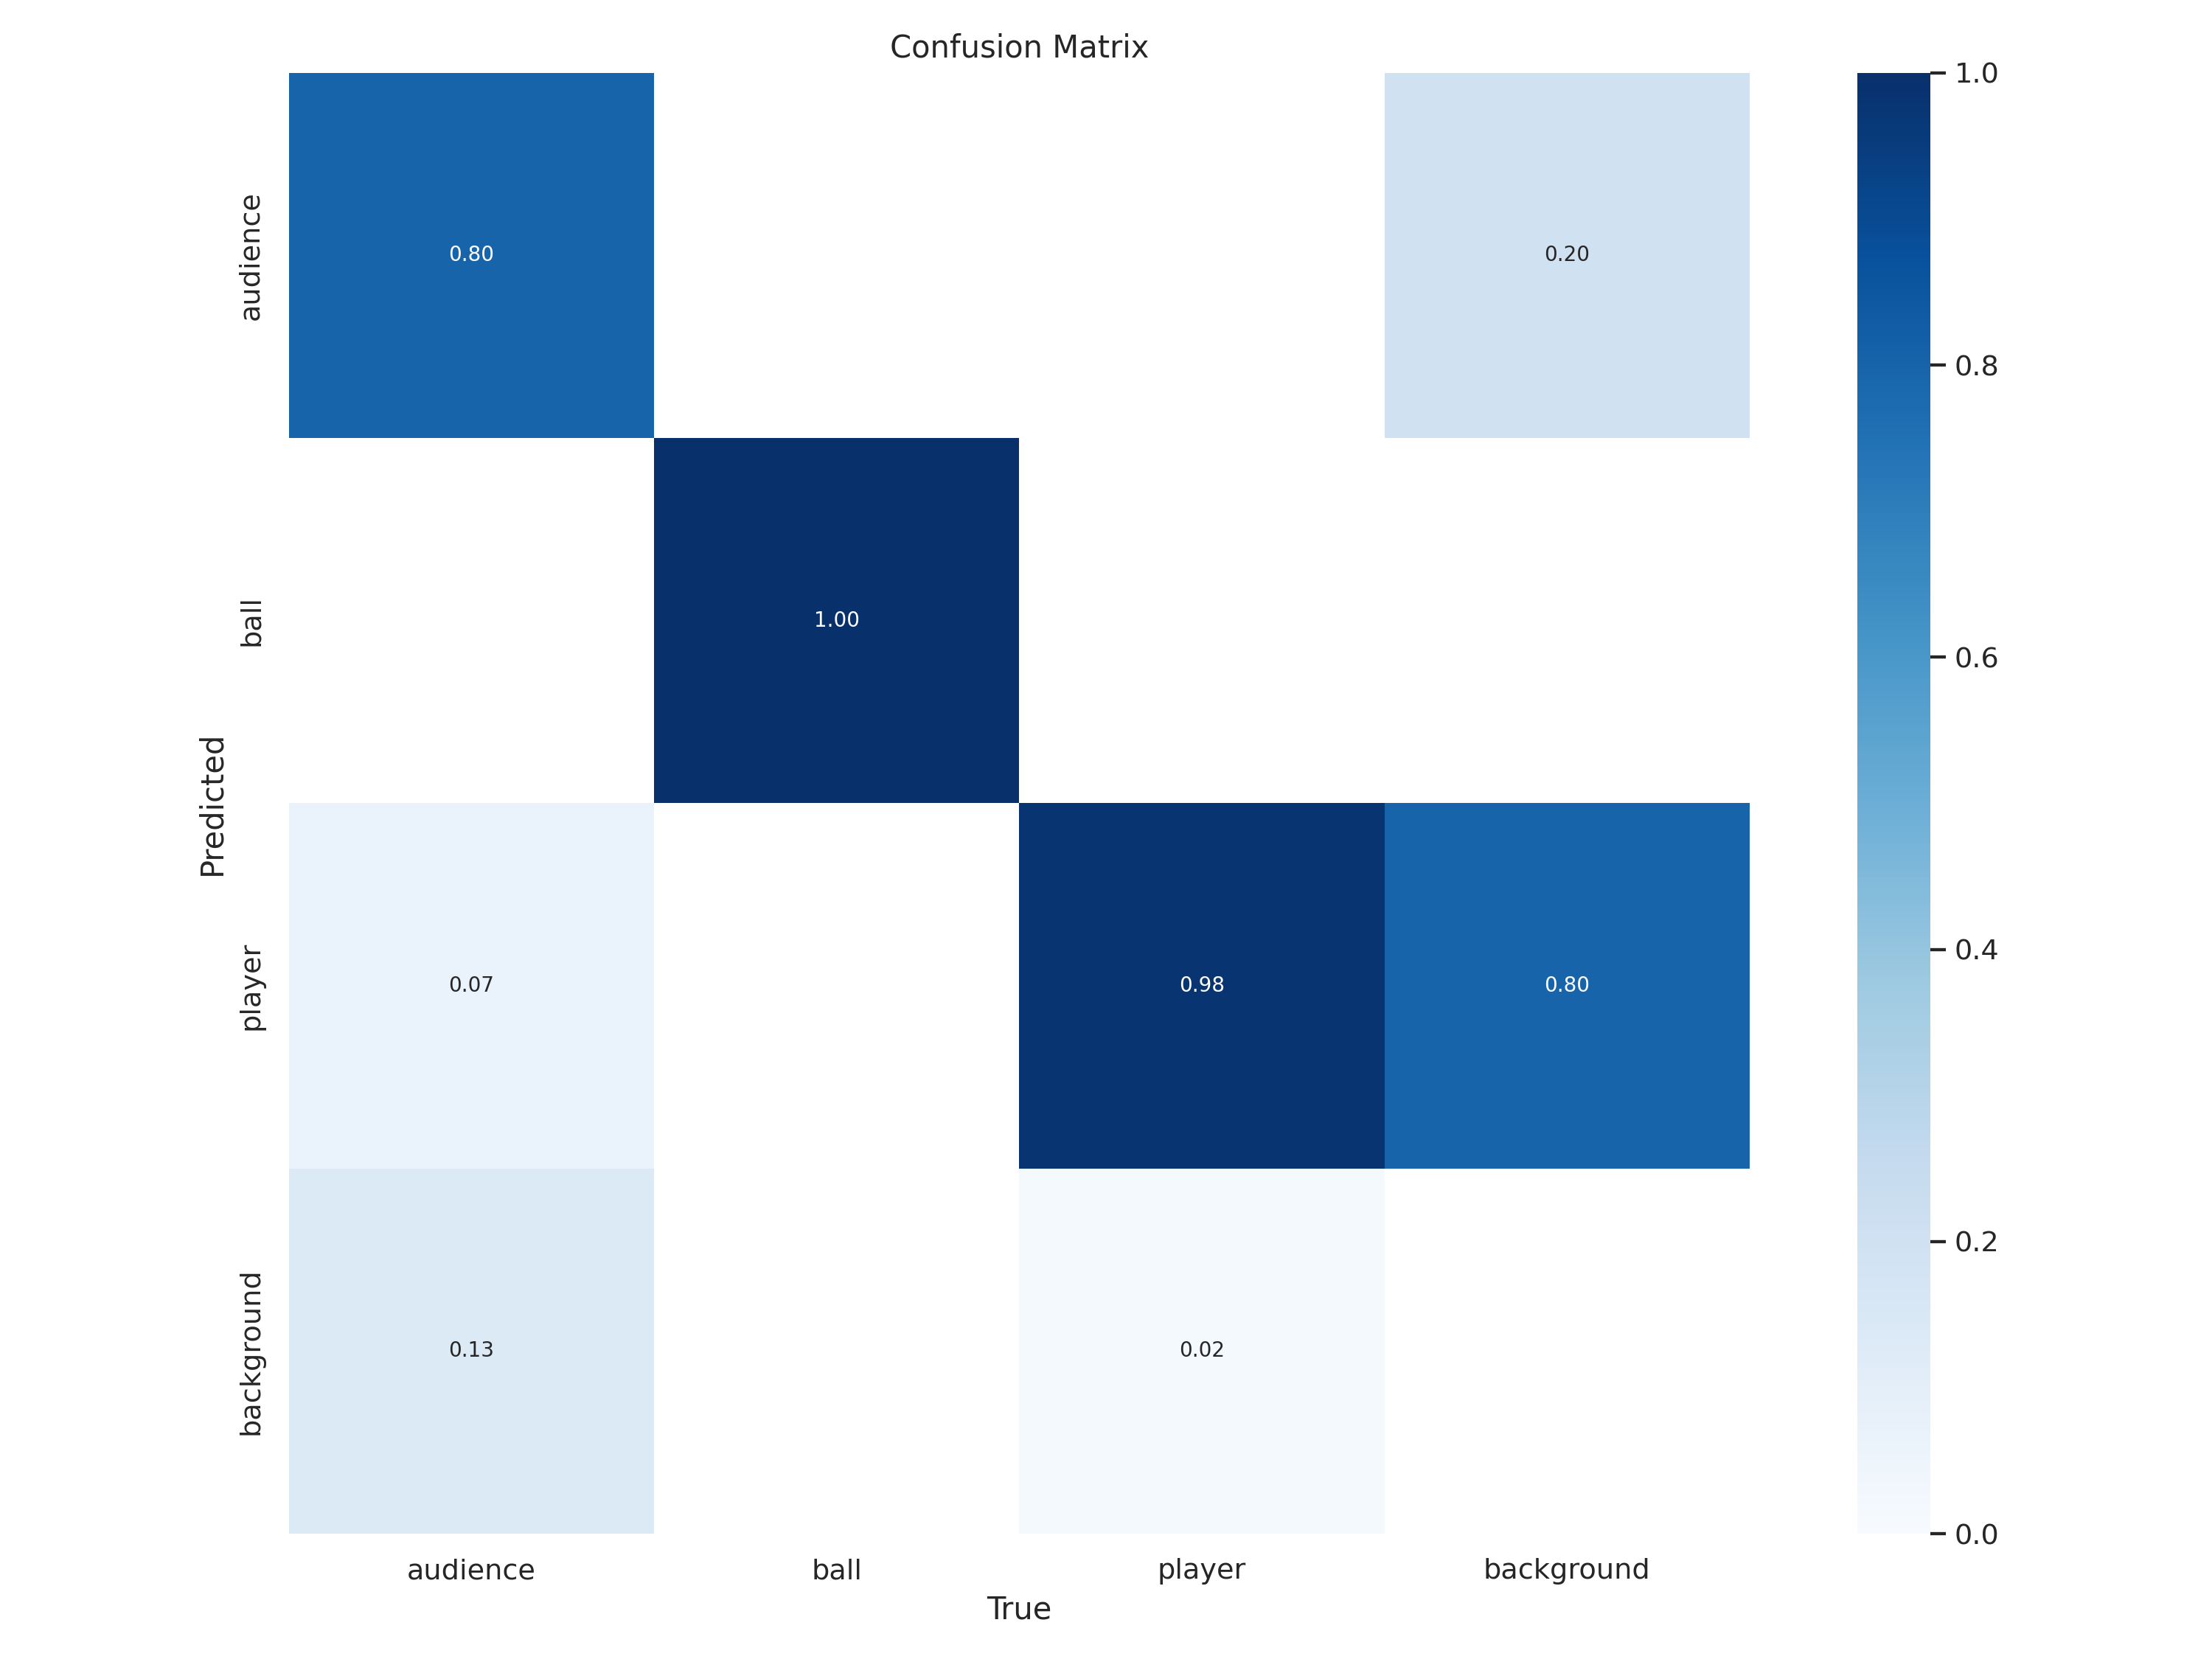

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


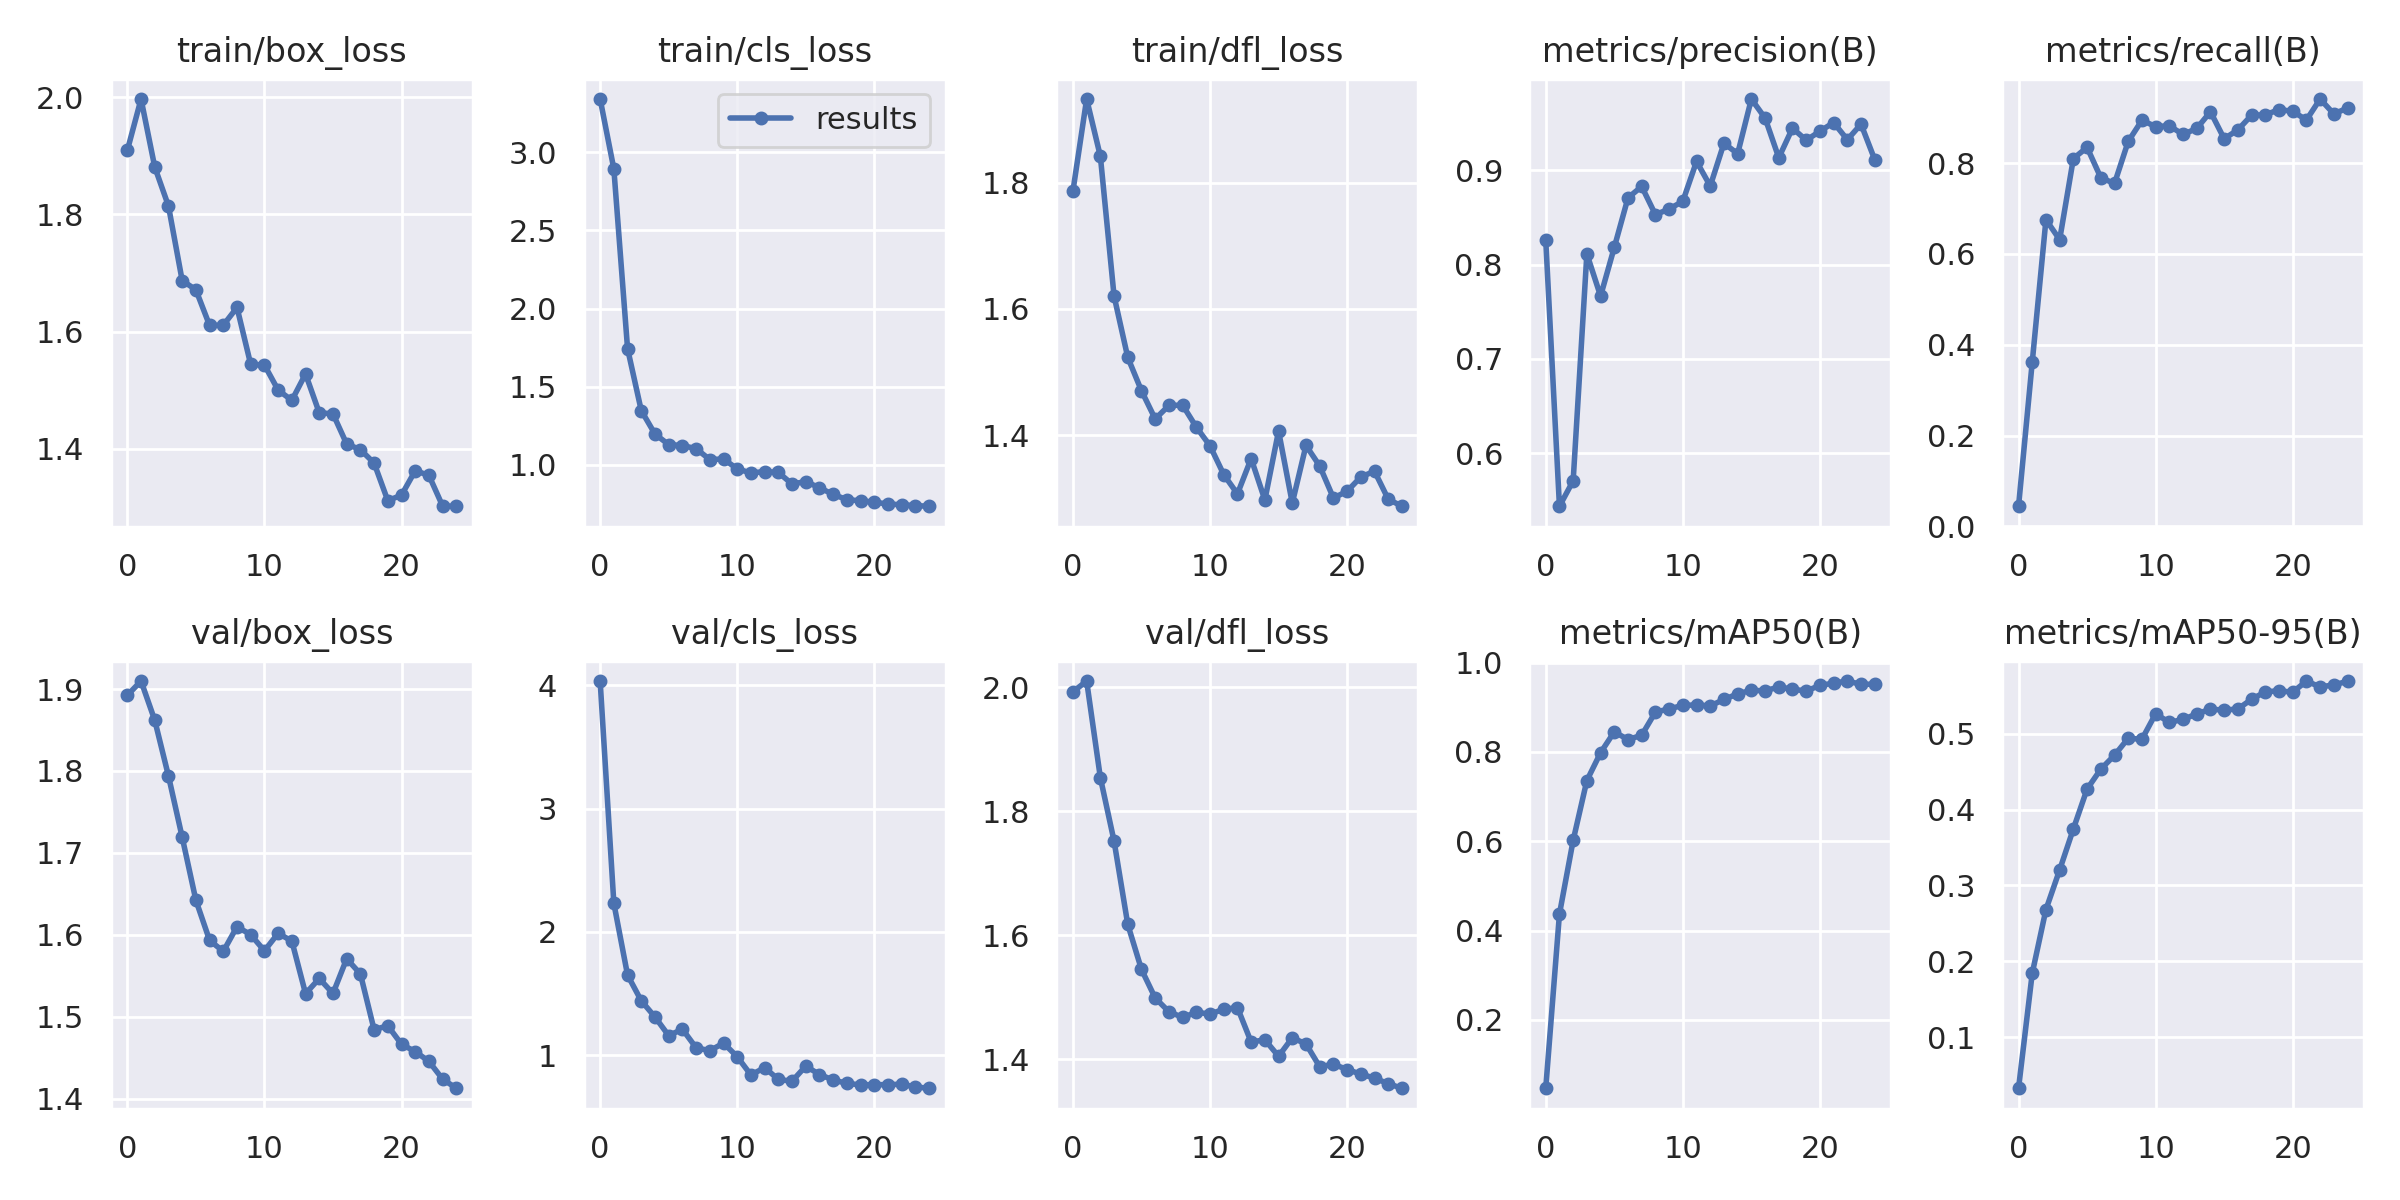

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


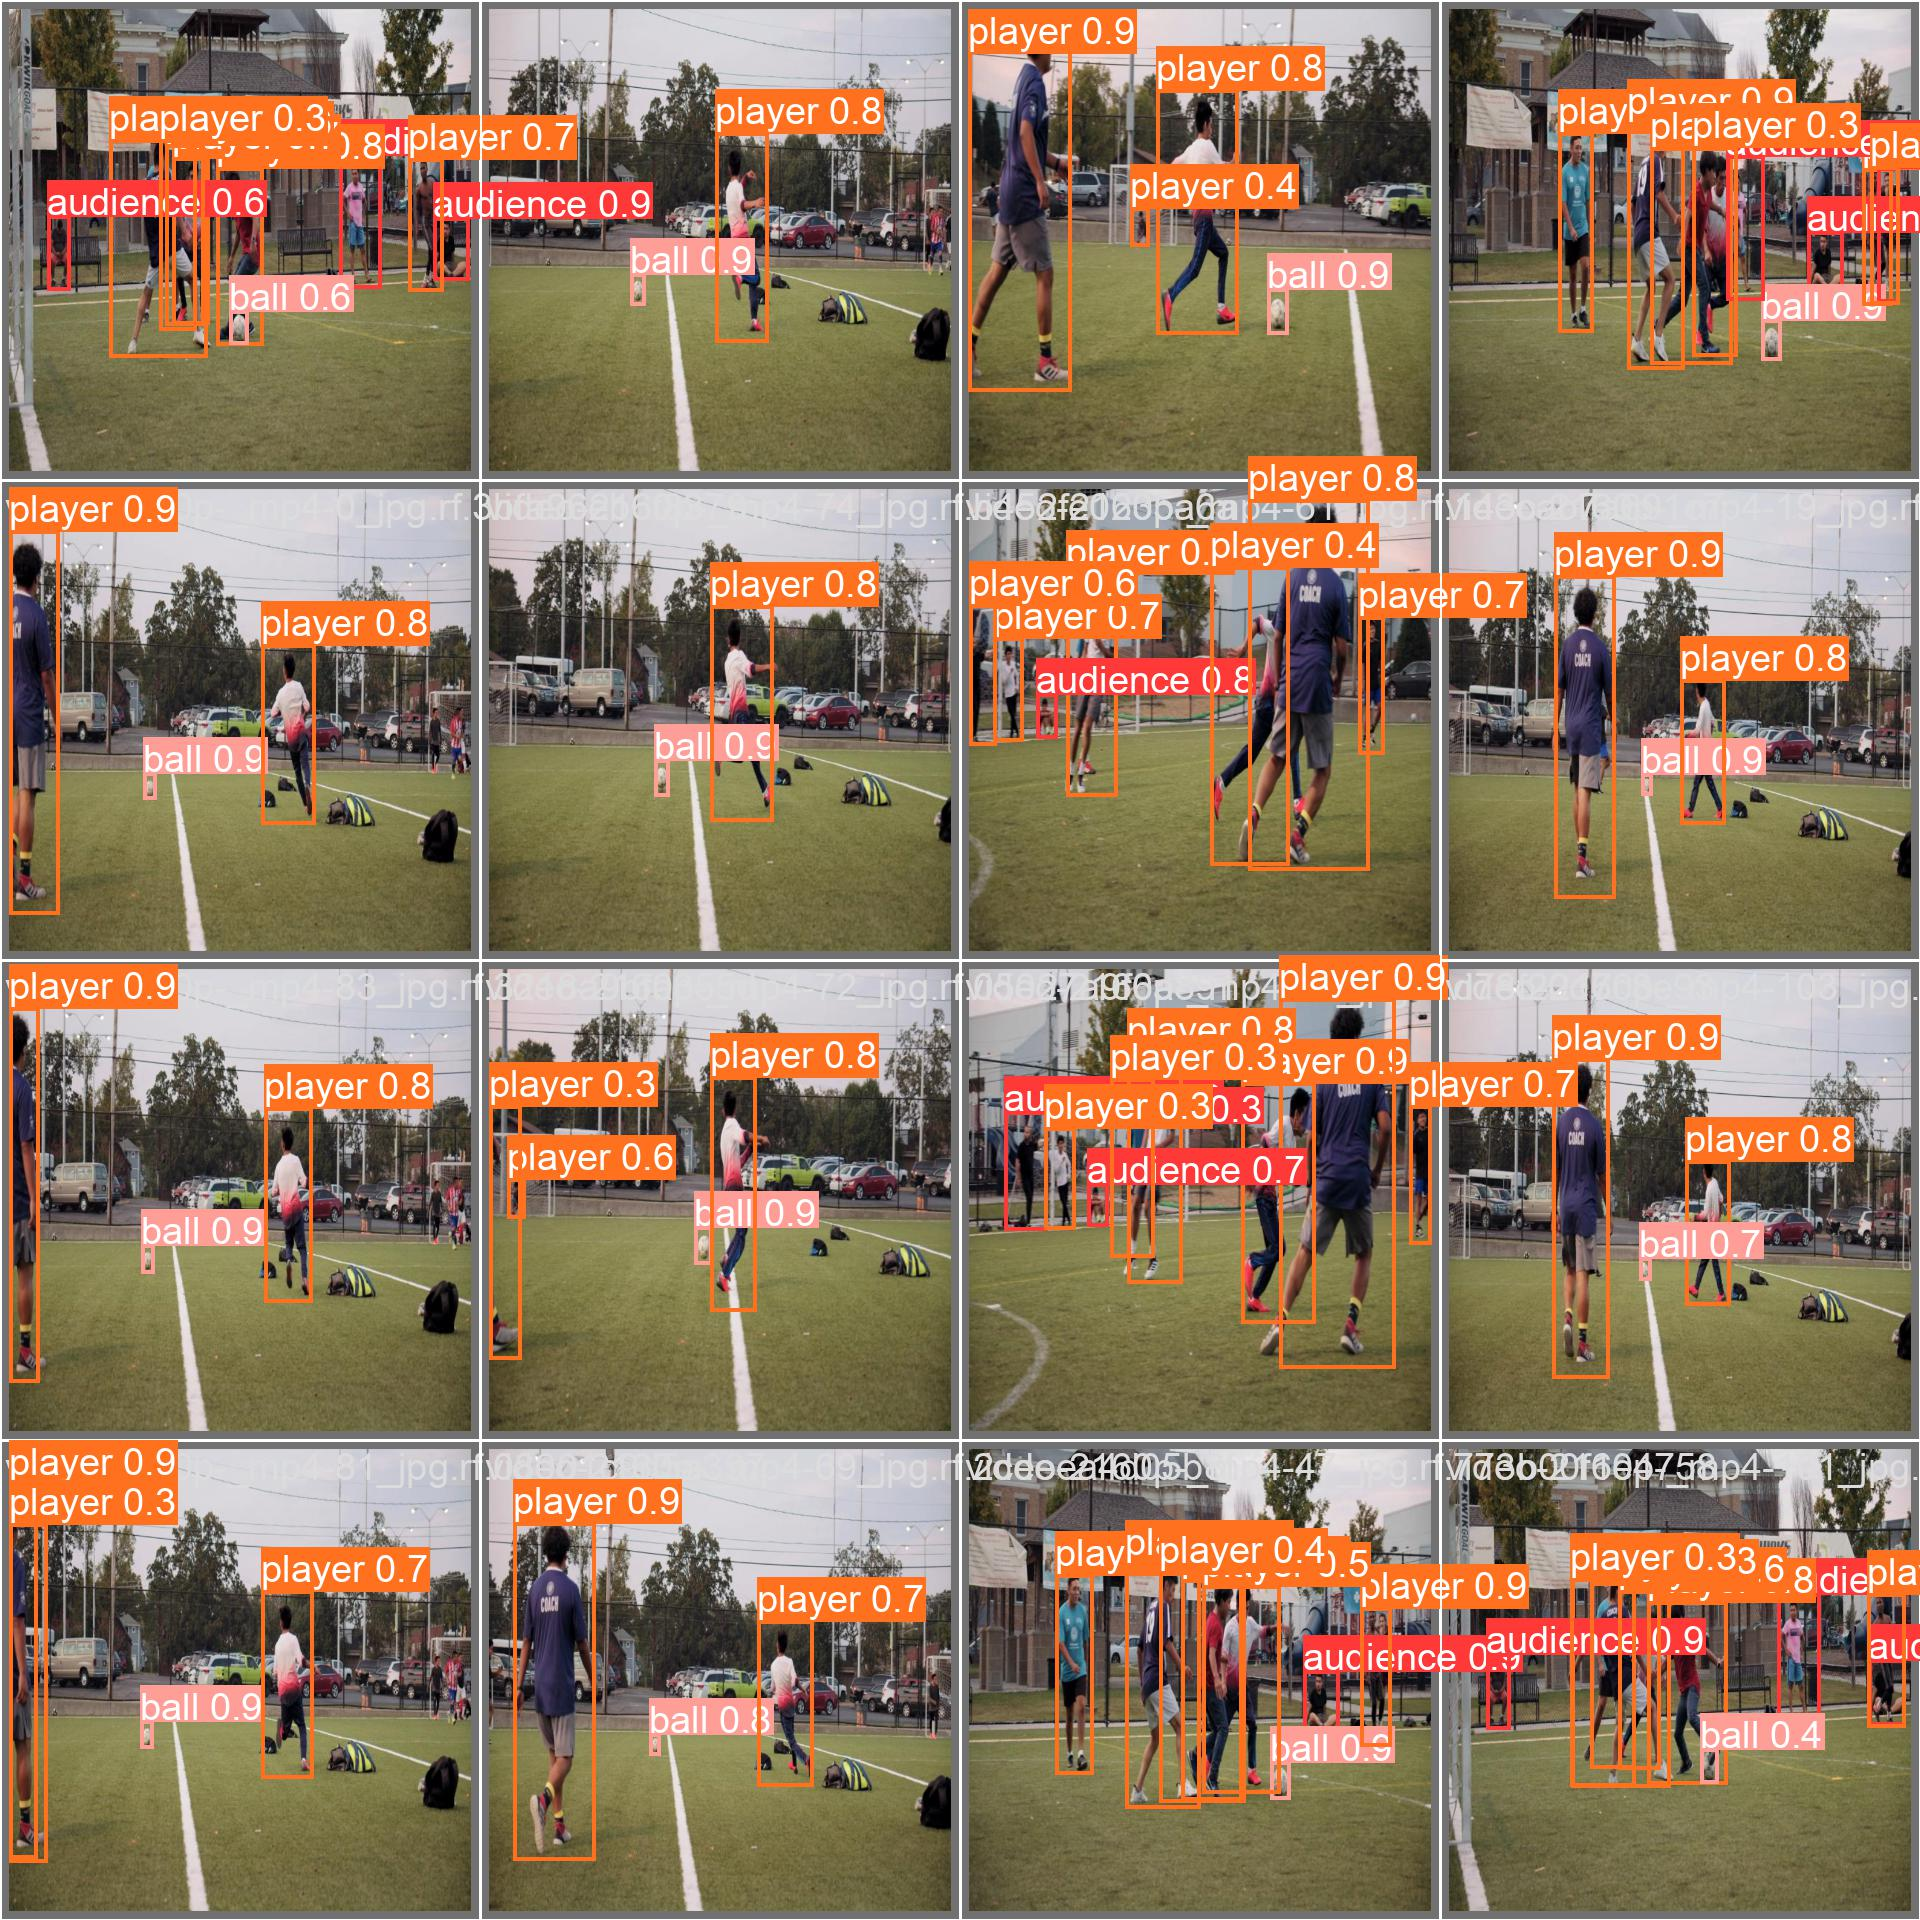

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-07-07 15:00:42.390770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:00:43.353764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Football-Players-2/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.36it/s]
                   all         17         82       0.95      0.895      0.954      0.569
              audience         17   

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-07-07 15:01:01.116822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:01:02.046882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/11 /content/datasets/Football-Players-2/test/images/video-2160p-_mp4-107_jpg.rf.a024857813e9f8769f0373226c19d4b1.jpg: 800x800 1 ball, 3 players, 24.6ms
image 2/11 /content/datasets/Football-Players-2/test/images/video-2160p-_mp4-17_jpg.rf.fea06905171fb9e686e2696df6d9b343.jpg: 800x800 3 audiences, 1 ball, 6 players, 24.7ms
image 3/11 /content/datasets/Football-Players-2/test/im

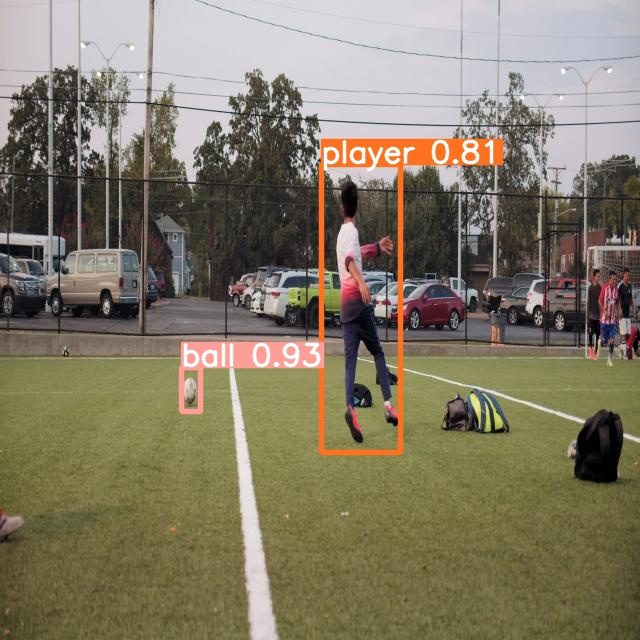

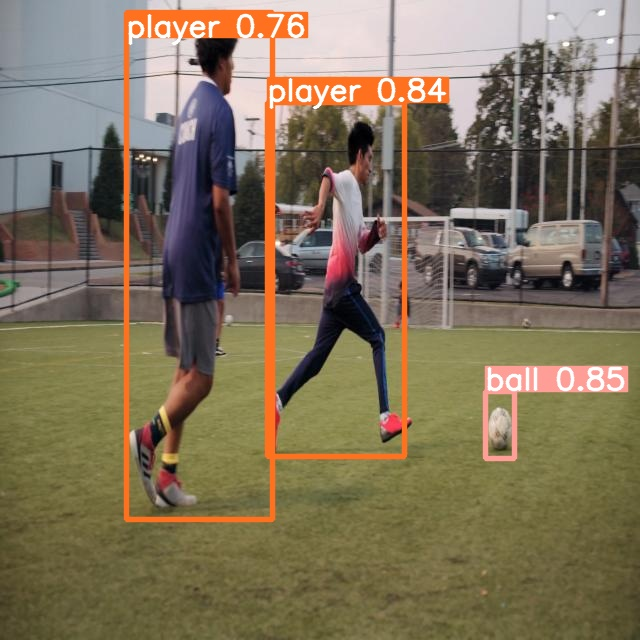

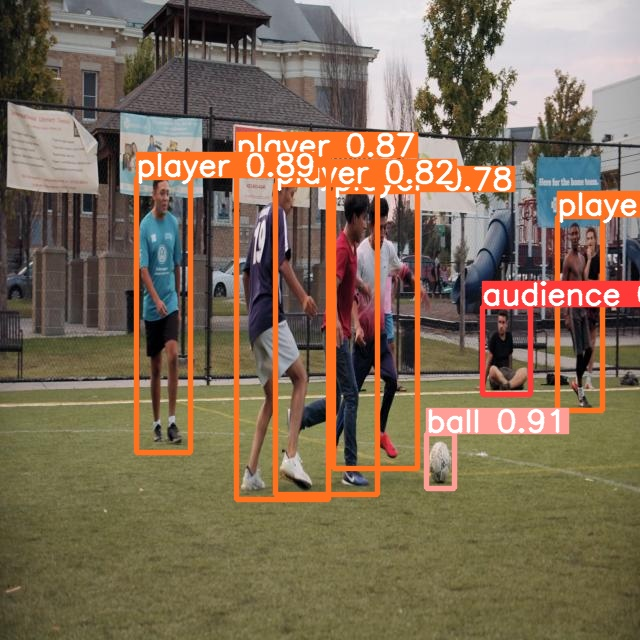

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/sambhavs-vision/football-players-xgy1l/deploy/2
Share your model with the world at: https://universe.roboflow.com/sambhavs-vision/football-players-xgy1l/model/2


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="######################")
project = rf.workspace().project("football-players-xgy1l")
model = project.version(dataset.version).model

import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

loading Roboflow workspace...
loading Roboflow project...
running inference on video-2160p-_mp4-56_jpg.rf.59f2b3869025eb5be07ae67536888c4e.jpg


{'predictions': [{'x': 349.0,
   'y': 285.5,
   'width': 104.0,
   'height': 353.0,
   'confidence': 0.9002583026885986,
   'class': 'player',
   'image_path': '/content/datasets/Football-Players-2/test/images/video-2160p-_mp4-56_jpg.rf.59f2b3869025eb5be07ae67536888c4e.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 523.5,
   'y': 421.5,
   'width': 29.0,
   'height': 65.0,
   'confidence': 0.8478517532348633,
   'class': 'ball',
   'image_path': '/content/datasets/Football-Players-2/test/images/video-2160p-_mp4-56_jpg.rf.59f2b3869025eb5be07ae67536888c4e.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 227.5,
   'y': 270.5,
   'width': 157.0,
   'height': 507.0,
   'confidence': 0.7970985770225525,
   'class': 'player',
   'image_path': '/content/datasets/Football-Players-2/test/images/video-2160p-_mp4-56_jpg.rf.59f2b3869025eb5be07ae67536888c4e.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
!zip -r /content/runs.zip /content/runs


updating: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/R_curve.png (deflated 12%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/PR_curve.png (deflated 22%)
  adding: content/runs/detect/val/F1_curve.png (deflated 9%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 32%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 6%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/P_curve.png (deflated 13%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/R_curve.png (deflated 10%)
  adding: content/runs/detect/train/train_batch75.jpg (deflated 5%)
  adding: content/runs/detect/train/results.csv (deflated 83%)
  adding: content/runs/detect/train/even

In [ ]:
import cv2

# Path to the video file
video_path = 'content/pexels-tima-miroshnichenko-6079620 (1080p).mp4'

# Open the video file
video = cv2.VideoCapture(video_path)

# Read and display frames until the video ends
while video.isOpened():
    ret, frame = video.read()

    # Break the loop if no more frames are available
    if not ret:
        break


    pred = model.predict(frame, confidence=10, overlap=10).json()
    print(pred)
    # Display the frame
    cv2.imshow('Video', frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video object and close windows
video.release()
cv2.destroyAllWindows()
